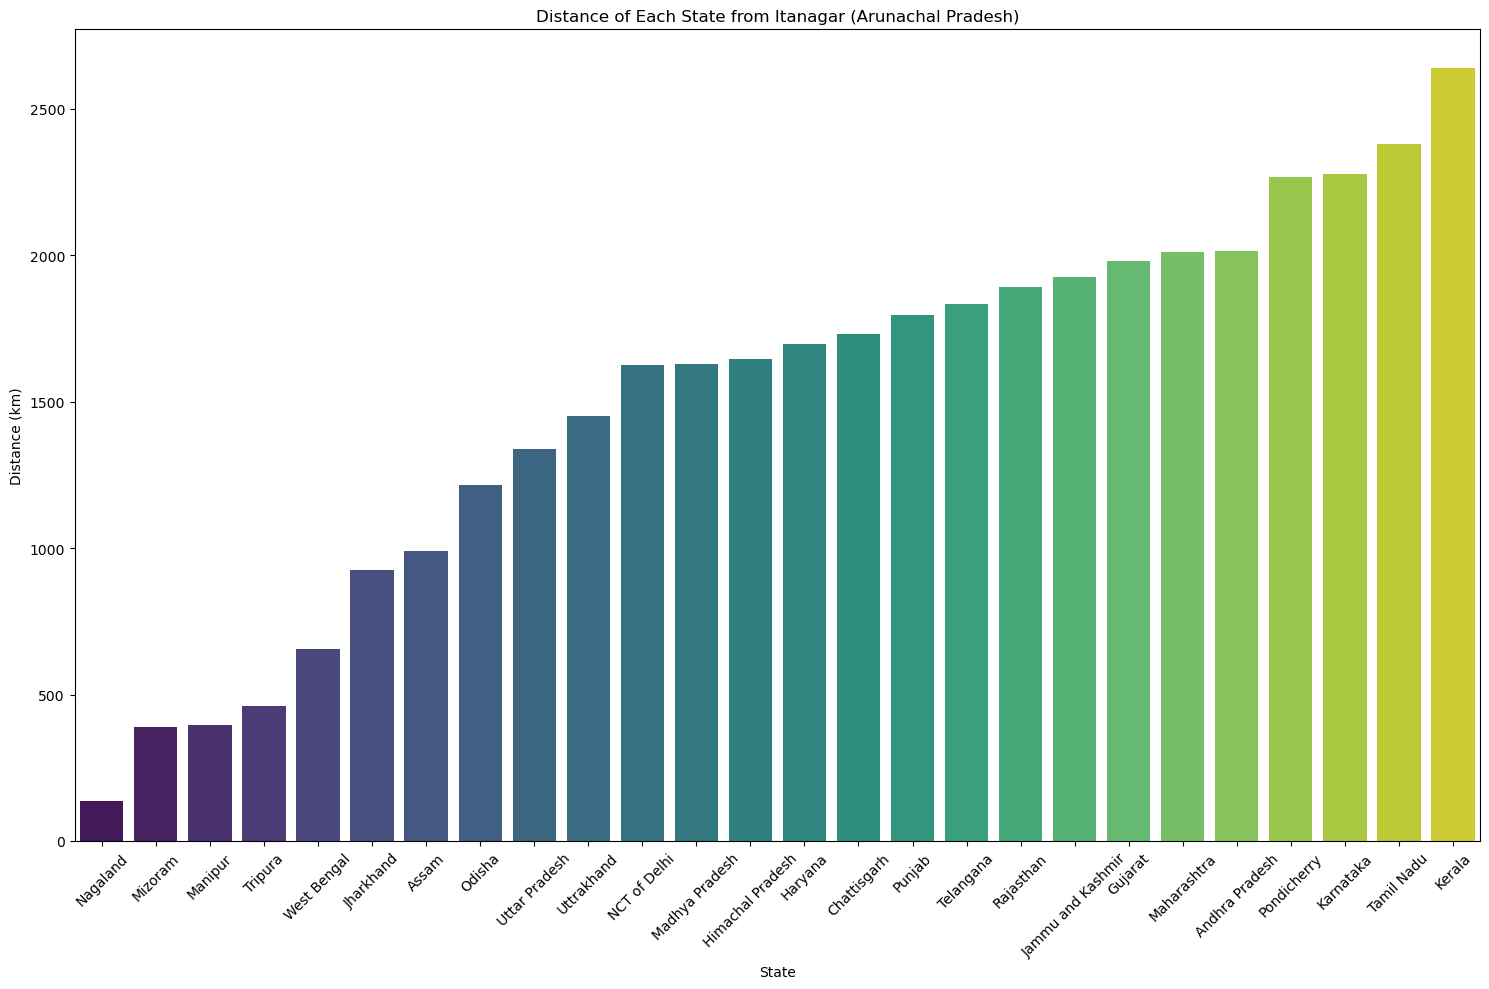

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2

# Define the Haversine function to calculate the great-circle distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Load your weather data from the CSV file
data = pd.read_csv('indiawheather.csv')

# Filter necessary columns and group by state to calculate the average latitude and longitude
state_avg_coords = data.groupby('state')[['latitude', 'longitude']].mean().reset_index()

# Coordinates of Itanagar (capital of Arunachal Pradesh)
itanagar_coords = (27.1023, 93.6927)

# Calculate distances from Itanagar
distances = []
for index, row in state_avg_coords.iterrows():
    state = row['state']
    lat = row['latitude']
    lon = row['longitude']
    distance = haversine(itanagar_coords[0], itanagar_coords[1], lat, lon)
    distances.append((state, distance))

# Create a DataFrame for visualization
distance_df = pd.DataFrame(distances, columns=['State', 'Distance'])

# Sort the data by distance
distance_df_sorted = distance_df.sort_values(by='Distance', ascending=True)

# Set up the figure and size
plt.figure(figsize=(15, 10))

# Plotting the bar chart using Seaborn
sns.barplot(x='State', y='Distance', data=distance_df_sorted, palette='viridis')

# Adding labels and title
plt.title('Distance of Each State from Itanagar (Arunachal Pradesh)')
plt.xlabel('State')
plt.ylabel('Distance (km)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Ensure labels and title fit within the figure area
plt.tight_layout()

# Show the plot
plt.show()
